# Сэмплирование апостериорной функции
# методом Метрополиса-Хастингса

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm, shapiro, kstest, anderson
from sklearn.mixture import GaussianMixture

In [81]:
T = 30
B_real = np.random.uniform(size=6)

# сгенерированные значения x
X = np.random.uniform(low=-1.5, high=1.5, size=30)
X = np.sort(X)

# матрица X в степенях
X_pow = np.array([[x ** i for i in range(6)] for x in X])

 # предподсчитанные Y с нормальной ошибкой
Y_ = X_pow @ B_real.T
Y = X_pow @ B_real.T + np.random.normal(0, 0.1)


In [115]:
X_pow

array([[ 1.00000000e+00, -1.47395338e+00,  2.17253856e+00,
        -3.20222055e+00,  4.71992379e+00, -6.95694762e+00],
       [ 1.00000000e+00, -1.37507693e+00,  1.89083656e+00,
        -2.60004573e+00,  3.57526290e+00, -4.91626152e+00],
       [ 1.00000000e+00, -1.17395683e+00,  1.37817463e+00,
        -1.61791752e+00,  1.89936531e+00, -2.22977288e+00],
       [ 1.00000000e+00, -1.16597334e+00,  1.35949382e+00,
        -1.58513355e+00,  1.84822346e+00, -2.15497927e+00],
       [ 1.00000000e+00, -1.14348189e+00,  1.30755084e+00,
        -1.49516070e+00,  1.70968919e+00, -1.95499862e+00],
       [ 1.00000000e+00, -1.10554627e+00,  1.22223256e+00,
        -1.35123465e+00,  1.49385243e+00, -1.65152298e+00],
       [ 1.00000000e+00, -1.09532950e+00,  1.19974672e+00,
        -1.31411798e+00,  1.43939219e+00, -1.57660874e+00],
       [ 1.00000000e+00, -1.05387243e+00,  1.11064711e+00,
        -1.17048037e+00,  1.23353700e+00, -1.29999064e+00],
       [ 1.00000000e+00, -8.96421356e-01,  8.035

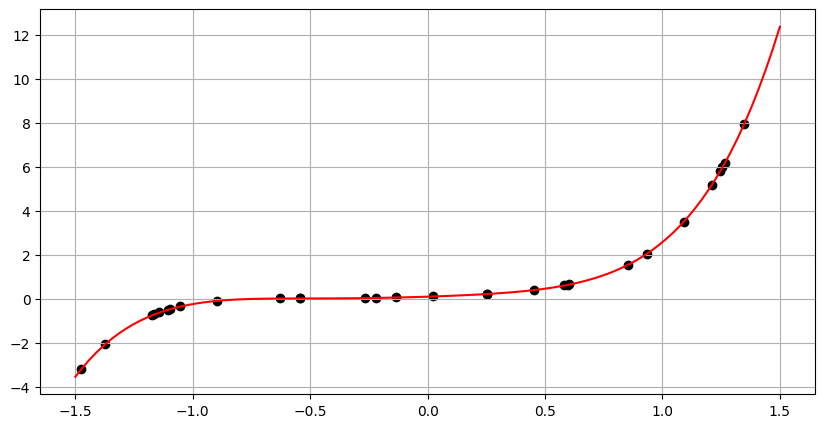

In [83]:
curve_x = np.linspace(-1.5, 1.5, 100)
curve_y = np.polyval(B_real[::-1], curve_x)
plt.figure(figsize=(10, 5))
plt.plot(curve_x, curve_y, color='red')
plt.scatter(X, Y, color='black')
plt.grid(True)
plt.show()

In [84]:
#  индикаторная функция
def pdf(B, sigma):
	sigma_pow = np.power(1 / sigma, T + 1)
	ident = (sigma > 0) and (sigma < np.inf)
	sigma_sq = -1 / 2 * sigma ** 2
	matr = np.square(Y - X_pow @ B.T).mean()
	# print(f"{sigma_pow=} {ident=} {sigma_sq=} {matr=}")
	return sigma_pow * np.exp(sigma_sq * matr) * ident

In [85]:
def proprnd(y, sigma):
  y = np.random.multivariate_normal(y, np.diag(VarEmpirical[:6]))
  sigma = abs(np.random.normal(sigma, VarEmpirical[6] ** 2))
  return y, sigma

In [128]:
nsamples = 30000
samples = np.zeros((nsamples, 7))
VarEmpirical = np.array([0.439828,  0.89128817,  0.9993982 , -0.99183786,  0.98447824,
       -1.31974212, -3.08468906e-2]) / 2

In [129]:
def MH():
  current_sample, noise = np.copy(B_real), 1.01
  accept_count = 0
  for i in range(nsamples):
      next_sample, next_noise = proprnd(current_sample, noise)
      cur =  pdf(current_sample, noise)
      next = pdf(next_sample, next_noise)
      prob_transition = min(1, next / cur)
      if np.random.uniform(0, 1) < prob_transition:
          accept_count += 1
          current_sample, noise = next_sample, next_noise

      samples[i, :] = *current_sample, noise
  return accept_count

In [130]:
accept_rate = 0
while accept_rate < 0.20:
    accept_rate = MH() / nsamples
    VarEmpirical = [abs(v + np.random.normal(0, 0.00001)) if i < 7 else  abs(v + np.random.normal(0, 0.000001)) for i, v in enumerate(VarEmpirical)]
    print(accept_rate)

C:\Users\germa\AppData\Local\Temp\ipykernel_10668\414553561.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  y = np.random.multivariate_normal(y, np.diag(VarEmpirical[:6]))


0.3217333333333333


In [131]:
accept_rate

0.3217333333333333

In [132]:
VarEmpirical

[0.21990923911030494,
 0.4456539727460637,
 0.49969317112160694,
 0.49591531075512724,
 0.49224425422995133,
 0.6598572560000759,
 0.015409860152022137]

## Гистограммы распределения параметров модели

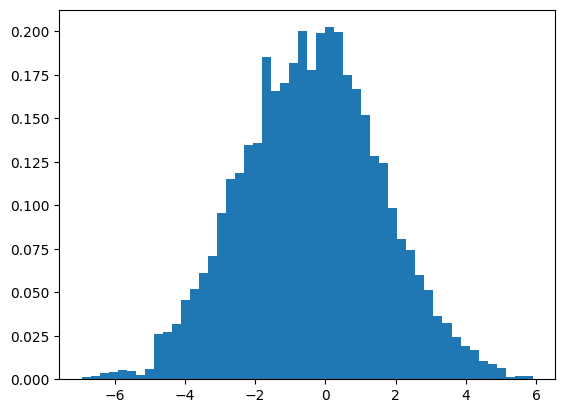

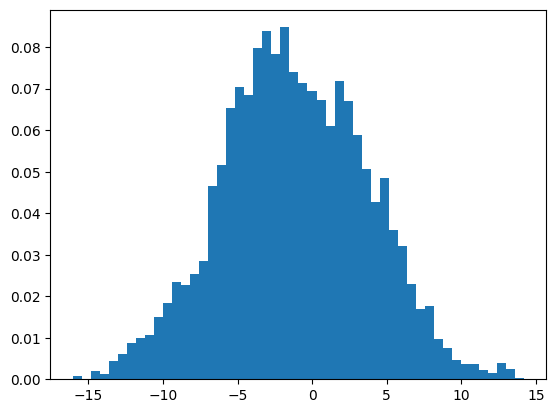

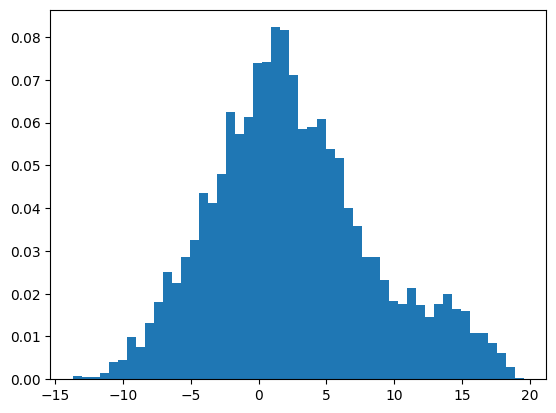

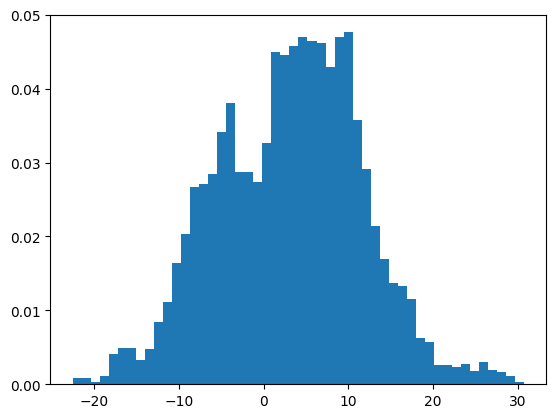

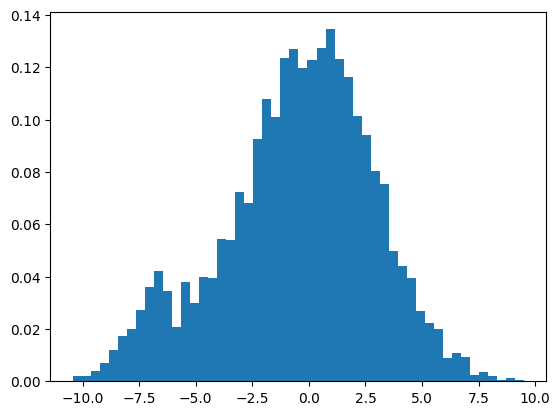

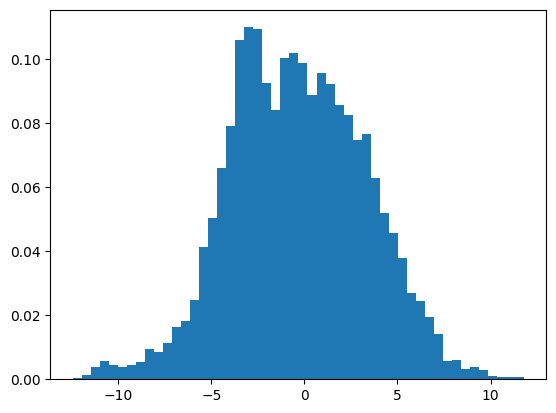

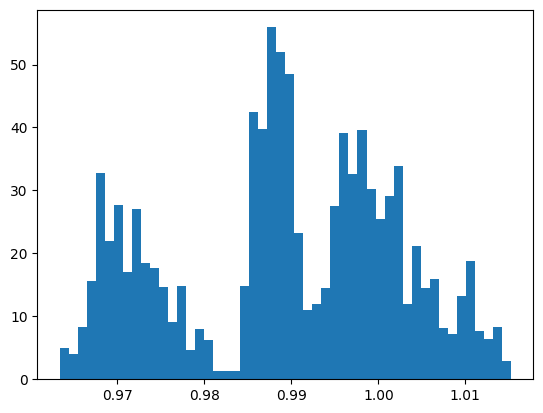

In [133]:
for i in range(7):
  plt.hist(samples[:, i], density=True, bins=50)
  plt.show()

In [134]:
from sklearn.model_selection import train_test_split
X_pow_train, X_pow_test, x_train, x_test, y_train, y_test = train_test_split(X_pow, X, Y, train_size=0.5, shuffle=False)

In [143]:
samples

array([[ 0.11497621,  0.35159244,  0.3919183 , ...,  0.67734034,
         0.91579509,  1.01      ],
       [ 0.11497621,  0.35159244,  0.3919183 , ...,  0.67734034,
         0.91579509,  1.01      ],
       [-0.09199555,  0.56486582,  0.15588275, ...,  1.27105113,
         1.245824  ,  1.00978165],
       ...,
       [-2.43033773, -0.1785743 ,  9.46974962, ..., -4.93043978,
        -2.58287401,  0.97569256],
       [-2.43033773, -0.1785743 ,  9.46974962, ..., -4.93043978,
        -2.58287401,  0.97569256],
       [-2.43033773, -0.1785743 ,  9.46974962, ..., -4.93043978,
        -2.58287401,  0.97569256]])

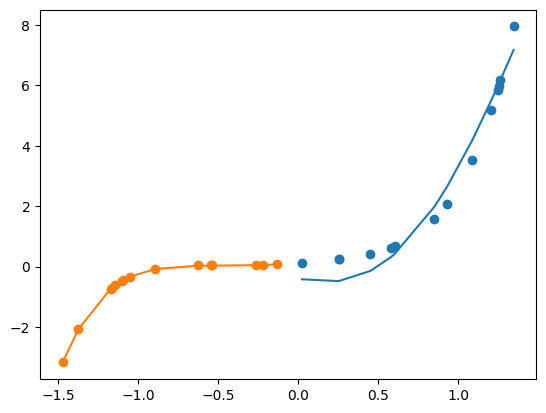

In [147]:
coef = np.mean(samples[:, :-1], axis=0)
plt.scatter(x_test, y_test)
plt.plot(x_test, X_pow_test @ coef.T)
plt.scatter(x_train, y_train)
plt.plot(x_train, X_pow_train @ B_real.T)

# Сэмпилрование смеси нормальных распределений

### Параметры распределений и генерация значений

In [95]:
mean1, disp1 = -1, 0.9
mean2, disp2 = 2, 0.7
w1, w2 = 0.7, 0.3
distrib_size = 10000
distrib1 = np.random.normal(mean1, disp1, int(distrib_size * w1) )
distrib2 = np.random.normal(mean2, disp2, int(distrib_size * w2))

mixture = np.concatenate((distrib1, distrib2))

### Проверка нормальности компонент смеси распределения

In [96]:
print(f"Критерий Шапиро для distrib1 {shapiro(distrib1)}")
print(f"Критерий Шапиро для distrib2 {shapiro(distrib2)}")
res1, res2 =anderson(distrib1), anderson(distrib2)
print(f"Критерий Андерсона-Дарлинга для distrib1 {res1.statistic, res1.fit_result.message}")
print(f"Критерий Андерсона-Дарлинга для distrib2 {res2.statistic, res2.fit_result.message}")

Критерий Шапиро для distrib1 ShapiroResult(statistic=0.999447762966156, pvalue=0.03164059668779373)
Критерий Шапиро для distrib2 ShapiroResult(statistic=0.9995441436767578, pvalue=0.7382877469062805)
Критерий Андерсона-Дарлинга для distrib1 (0.5746964189238497, '`anderson` successfully fit the distribution to the data.')
Критерий Андерсона-Дарлинга для distrib2 (0.3252583995981695, '`anderson` successfully fit the distribution to the data.')


c:\users\germa\desktop\jn\venv\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


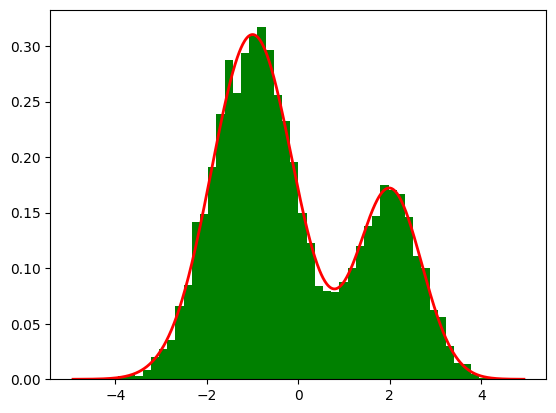

In [97]:
# Построение гистограммы плотностей смеси
plt.hist(mixture, bins=50, density=True,color='green')

# Построение кривой смеси
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
p = w1 * norm.pdf(x, mean1, disp1) + w2 * norm.pdf(x, mean2, disp2)
plt.plot(x, p, linewidth=2, color='red')
plt.show()

## Разделение смеси с использованием EM-алгоритма

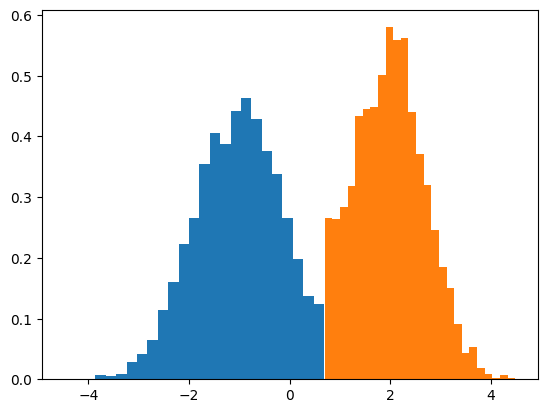

Means: [[-1.03997366]
 [ 1.95100684]]
Covariances: [[[0.72915285]]

 [[0.56261814]]]


In [98]:
# подготовка данных
reshaped_mixture = mixture.reshape(-1, 1)

# EM-алгоритм для разделения смеси
gmm = GaussianMixture(n_components=2)
gmm.fit(reshaped_mixture)

# Визуализация разделенной смеси данных с использованием гистограммы
for component in range(gmm.n_components):
    plt.hist(mixture[gmm.predict(reshaped_mixture) == component], bins=25, density=True)
plt.show()
print("Means:", gmm.means_)
print("Covariances:", gmm.covariances_)

# 4 часть (бонусная)

## Диинамика одномерного показателя

In [151]:
from sklearn.datasets import fetch_openml

australian_dollar = fetch_openml(
    "Currency-Exchange-Rates", as_frame=True, parser="pandas"
)
df = australian_dollar.frame.iloc[:151].Australian_Dollar

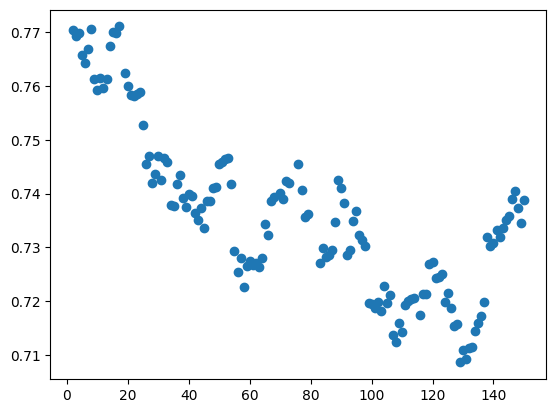

In [152]:
plt.scatter(range(len(df)), df)

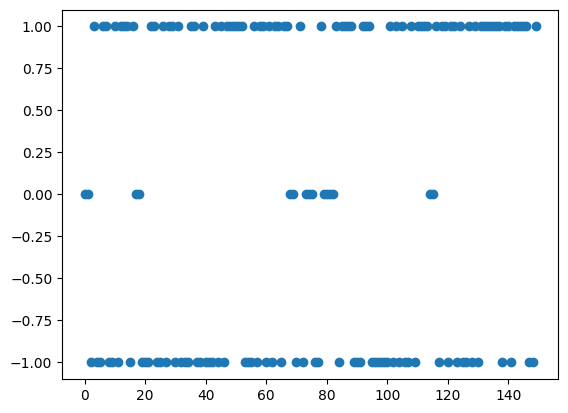

In [153]:
log_p = -(df.shift(-1) < df).astype(int) + (df.shift(-1) > df).astype(int)
log_p = log_p[:-1]
plt.scatter(range(len(log_p)), log_p)